# Data Understanding

Import librairies


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [2]:
file_path = 'full_dataset_normalized_2.csv'
data = pd.read_csv(file_path)

<ipython-input-2-5f8b298d359c>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
data.head()

,Date,code_dep,Homicides,Vols,Cambriolages à domicile ou violaiton de domicile,Crimes ou délits sexuelles,Infractions liées aux stupéfiants,Dégradations ou destructions de biens volontaires,Violences,Falsifications et contrefaçons,...,Crimes ou délits sexuelles_per_population,Infractions liées aux stupéfiants_per_population,Dégradations ou destructions de biens volontaires_per_population,Violences_per_population,Falsifications et contrefaçons_per_population,Délits Économiques et Financiers_per_population,Irégularités de Main-d'oeuvre_per_population,effectif_total_police_national_per_population,Chomage_per_population,density
0,2020-12-31,France_Métro,334,100149,19220,6233,15373,18688,30279,39799,...,0.000095,0.000236,0.000286,0.000464,0.000610,0.000020,0.000013,NaN,0.093126,101.380945
1,2020-11-30,France_Métro,287,86852,12762,6559,21340,18284,31860,39160,...,0.000100,0.000327,0.000280,0.000488,0.000600,0.000025,0.000016,NaN,0.093189,101.380945
2,2020-10-31,France_Métro,308,117119,20116,6406,21422,20370,32536,39578,...,0.000098,0.000328,0.000312,0.000498,0.000606,0.000027,0.000015,NaN,0.093251,101.380945
3,2020-09-30,France_Métro,343,125419,19515,6814,19659,21363,35031,39789,...,0.000104,0.000301,0.000327,0.000537,0.000610,0.000022,0.000016,NaN,0.093313,101.380945
4,2020-08-31,France_Métro,329,123620,20889,6327,12379,21848,33364,38851,...,0.000097,0.000190,0.000335,0.000511,0.000595,0.000017,0.000010,NaN,0.092824,101.380945


Choix des colonnes a traiter

In [4]:
column_names = data.columns
print(column_names)


Index(['Date', 'code_dep', 'Homicides', 'Vols',
       'Cambriolages à domicile ou violaiton de domicile',
       'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
       'Dégradations ou destructions de biens volontaires', 'Violences',
       'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
       'Irégularités de Main-d'oeuvre', 'annee', 'Population', 'Chomage',
       'Taux de pauvreté-moins de 30', 'Taux de pauvreté-30 à 39 ans',
       'Taux de pauvreté-40 à 49 ans', 'Taux de pauvreté-50 à 59 ans',
       'Taux de pauvreté-60 à 74 ans', 'Taux de pauvreté-75 ans ou plus',
       'Median_salaire', 'Taux de pauvreté-Ensemble', 'Bac_g_réussite_%',
       'Bac_t_réussite_%', 'Bac_p_réussite_%', 'Bac_g_%', 'Bac_t_%', 'Bac_p_%',
       'non_peu_diplômés_non_scolarisée_<15ans', 'Superficie\r\n(km2)',
       'effectif_total_police_national', 'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domici

In [5]:
#les données brutes
df = data[['Date', 'annee', 'code_dep', 'density',
                      'Chomage', 'effectif_total_police_national',
                      'Homicides', 'Vols',
                      'Cambriolages à domicile ou violaiton de domicile',
                      'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
                      'Dégradations ou destructions de biens volontaires', 'Violences',
                      'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
                      'Irégularités de Main-d\'oeuvre']]


In [6]:
# Crimes et delits
crimes_delits = [ 'Homicides', 'Vols',
                      'Cambriolages à domicile ou violaiton de domicile',
                      'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
                      'Dégradations ou destructions de biens volontaires', 'Violences',
                      'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
                      'Irégularités de Main-d\'oeuvre']


In [7]:
df['Total_Delinquance'] = df[crimes_delits].sum(axis=1)



<ipython-input-7-b7518a057a66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Delinquance'] = df[crimes_delits].sum(axis=1)


In [8]:
df.describe()

,annee,density,Chomage,effectif_total_police_national,Homicides,Vols,Cambriolages à domicile ou violaiton de domicile,Crimes ou délits sexuelles,Infractions liées aux stupéfiants,Dégradations ou destructions de biens volontaires,Violences,Falsifications et contrefaçons,Délits Économiques et Financiers,Irégularités de Main-d'oeuvre,Total_Delinquance
count,26328.000000,26328.000000,2.632800e+04,1200.000000,26328.000000,26328.000000,26328.000000,26328.000000,26328.000000,26328.000000,26328.000000,26328.000000,26328.000000,26328.000000,26328.000000
mean,2009.595716,536.763422,9.061581e+04,1441.500000,4.216727,2976.710764,373.863833,74.821901,278.273815,673.266712,437.453927,583.361858,13.553023,19.571331,5435.093892
std,6.323537,2358.278728,4.622223e+05,2767.901394,20.940838,14839.079252,1856.406847,377.973740,1411.637503,3468.533686,2206.962644,2898.780765,79.279504,97.070021,26827.452808
min,1999.000000,2.465514,8.300000e+02,65.000000,0.000000,34.000000,1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,79.000000
25%,2004.000000,49.551980,1.594975e+04,251.250000,0.000000,413.000000,55.000000,13.000000,42.000000,87.000000,67.000000,96.000000,1.000000,2.000000,818.750000
50%,2010.000000,82.927792,3.098000e+04,589.000000,1.000000,864.000000,113.000000,26.000000,83.000000,186.000000,138.000000,187.000000,2.000000,5.000000,1696.000000
75%,2015.000000,160.576306,5.511150e+04,1336.750000,3.000000,1760.250000,236.000000,49.000000,166.000000,429.000000,284.000000,363.000000,5.000000,13.000000,3191.000000
max,2020.000000,21347.011385,6.090490e+06,24182.000000,432.000000,206803.000000,27614.000000,7139.000000,21422.000000,62300.000000,35129.000000,40146.000000,1765.000000,1493.000000,342105.000000


Vu que les variables de l'ensemble de données présentent des ordres de grandeur distincts, nous utiliserons les données normalisées. Nous focaliserons notre analyse sur les crimes, le taux de chômage et la présence policière.


In [9]:
#les données normalisées
df_normalized = data[['Date', 'annee', 'code_dep', 'density',
       'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       'Irégularités de Main-d\'oeuvre_per_population',
       'effectif_total_police_national_per_population',
       'Chomage_per_population']]


In [10]:
# Crimes et delits normalisee
crimes_delits_normalized = ['Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       'Irégularités de Main-d\'oeuvre_per_population']



In [35]:
df_normalized['Total_Delinquance_per_population'] = df_normalized[crimes_delits_normalized].sum(axis=1)


<ipython-input-35-7f3188134f97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['Total_Delinquance_per_population'] = df_normalized[crimes_delits_normalized].sum(axis=1)


In [12]:
# Voir les valeurs nulles
null_counts = df_normalized[['effectif_total_police_national_per_population']].isnull().sum()

print("Nombre de valeurs nulles")
print("- Effectif total police national:", null_counts['effectif_total_police_national_per_population'])


Nombre de valeurs nulles
- Effectif total police national: 25128


In [13]:
print("La taille de la dataframe:", df_normalized.shape)

La taille de la dataframe: (26328, 17)


# Présence policière

# Donnees normalisees

Le dataset initiale a une taille de (26328, 17), mais leffectif total de la police nationale comporte 25512 valeurs manquantes.
Afin d étudier l impact de la présence policière sur la délinquance, j ai créé un nouveau dataframe,
df_police,
en se limitant aux lignes avec leffectif policier renseigné.


In [23]:
df_police_normalized = df_normalized.dropna(subset=['effectif_total_police_national_per_population'])


In [27]:
#fusion des codes dept 2A (Corse-du-Sud) et 2B (Haute-Corse) en 20 qui est la Corse
df_police_normalized['code_dep'] = df_police_normalized ['code_dep'].replace({'2A': '20', '2B': '20'})

<ipython-input-27-de0309d64633>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_police['code_dep'] = df_police['code_dep'].replace({'2A': '20', '2B': '20'})
<ipython-input-27-de0309d64633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_police_normalized['code_dep'] = df_police_normalized ['code_dep'].replace({'2A': '20', '2B': '20'})


In [26]:
df_police_normalized

,Date,annee,code_dep,density,Homicides_per_population,Vols_per_population,Cambriolages à domicile ou violaiton de domicile_per_population,Crimes ou délits sexuelles_per_population,Infractions liées aux stupéfiants_per_population,Dégradations ou destructions de biens volontaires_per_population,Violences_per_population,Falsifications et contrefaçons_per_population,Délits Économiques et Financiers_per_population,Irégularités de Main-d'oeuvre_per_population,effectif_total_police_national_per_population,Chomage_per_population,Total_Delinquance_per_population
360,2012-12-31,2012,01,106.238894,0.000000,0.001250,0.000410,0.000046,0.000204,0.000160,0.000222,0.000363,0.000010,0.000028,0.000485,0.043289,0.002692
361,2012-11-30,2012,01,106.238894,0.000002,0.001362,0.000408,0.000026,0.000219,0.000217,0.000253,0.000333,0.000005,0.000039,0.000485,0.042657,0.002865
362,2012-10-31,2012,01,106.238894,0.000003,0.001413,0.000256,0.000044,0.000229,0.000207,0.000305,0.000348,0.000003,0.000031,0.000485,0.042036,0.002841
363,2012-09-30,2012,01,106.238894,0.000000,0.001232,0.000240,0.000033,0.000183,0.000201,0.000252,0.000263,0.000000,0.000015,0.000485,0.041423,0.002418
364,2012-08-31,2012,01,106.238894,0.000000,0.001402,0.000196,0.000033,0.000167,0.000178,0.000237,0.000271,0.000002,0.000010,0.000485,0.040647,0.002494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26251,2012-05-31,2012,974,333.084635,0.000004,0.001120,0.000130,0.000048,0.000137,0.000249,0.000337,0.000143,0.000000,0.000011,0.001378,0.152532,0.002178
26252,2012-04-30,2012,974,333.084635,0.000001,0.001353,0.000167,0.000072,0.000174,0.000257,0.000462,0.000228,0.000005,0.000017,0.001378,0.152428,0.002734
26253,2012-03-31,2012,974,333.084635,0.000004,0.001290,0.000251,0.000073,0.000137,0.000321,0.000444,0.000264,0.000008,0.000019,0.001378,0.152324,0.002811
26254,2012-02-29,2012,974,333.084635,0.000002,0.001413,0.000162,0.000059,0.000108,0.000426,0.000506,0.000128,0.000004,0.000014,0.001378,0.151334,0.002822


In [51]:
pip install geopandas


# Visualisation

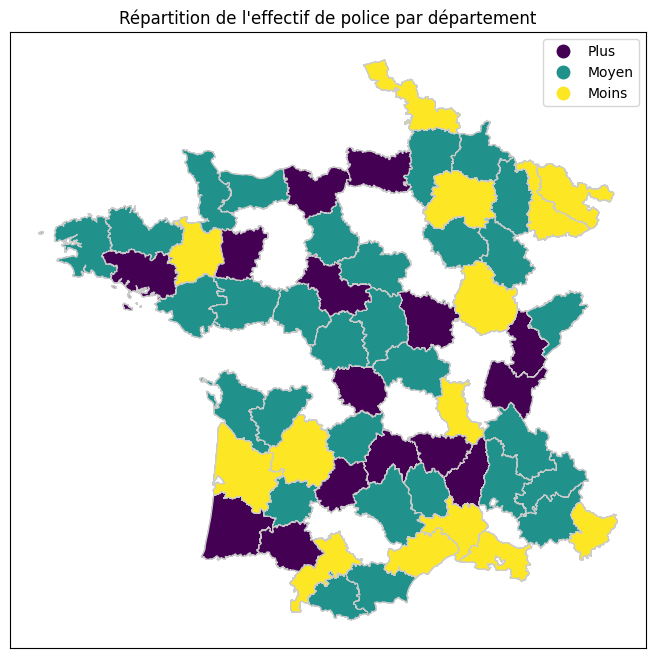

In [80]:
import geopandas as gpd

# Load GeoDataFrame from GeoJSON file
gdf = gpd.read_file('departements.geojson')

# Check if 'code_dep' is present in df_police_normalized
if 'code_dep' in df_police_normalized.columns:
    # Merge gdf with df_police_normalized on the department code
    merged_df = gdf.merge(df_police_normalized, left_on='code', right_on='code_dep')

    # Calculate quartiles to define categories
    q25 = merged_df['effectif_total_police_national_per_population'].quantile(0.25)
    q75 = merged_df['effectif_total_police_national_per_population'].quantile(0.75)

    # Categorize departments based on quartiles
    merged_df['category'] = pd.cut(
        merged_df['effectif_total_police_national_per_population'],
        bins=[-float('inf'), q25, q75, float('inf')],
        labels=['Plus', 'Moyen', 'Moins']
    )

    # Set up the figure and axis for the map
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the choropleth map using GeoJSON with the 'viridis' colormap
    merged_df.plot(column='category', ax=ax, legend=True, cmap='viridis', linewidth=0.8, edgecolor='0.8')

    # Remove x and y axis labels and tick values
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Add title and show the map
    plt.title('Répartition de l\'effectif de police par département')
    plt.show()

else:
    print("'code_dep' column not found in df_police_normalized")


Le graphique montre une répartition inégale de la police en France.
Cela a-il un impact sur la sécurité ?



<ipython-input-106-0ea0883c5d69>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_delinquencies_per_department = df_police_normalized.groupby('code_dep')['Total_Delinquance_per_population', 'effectif_total_police_national_per_population'].sum().reset_index()


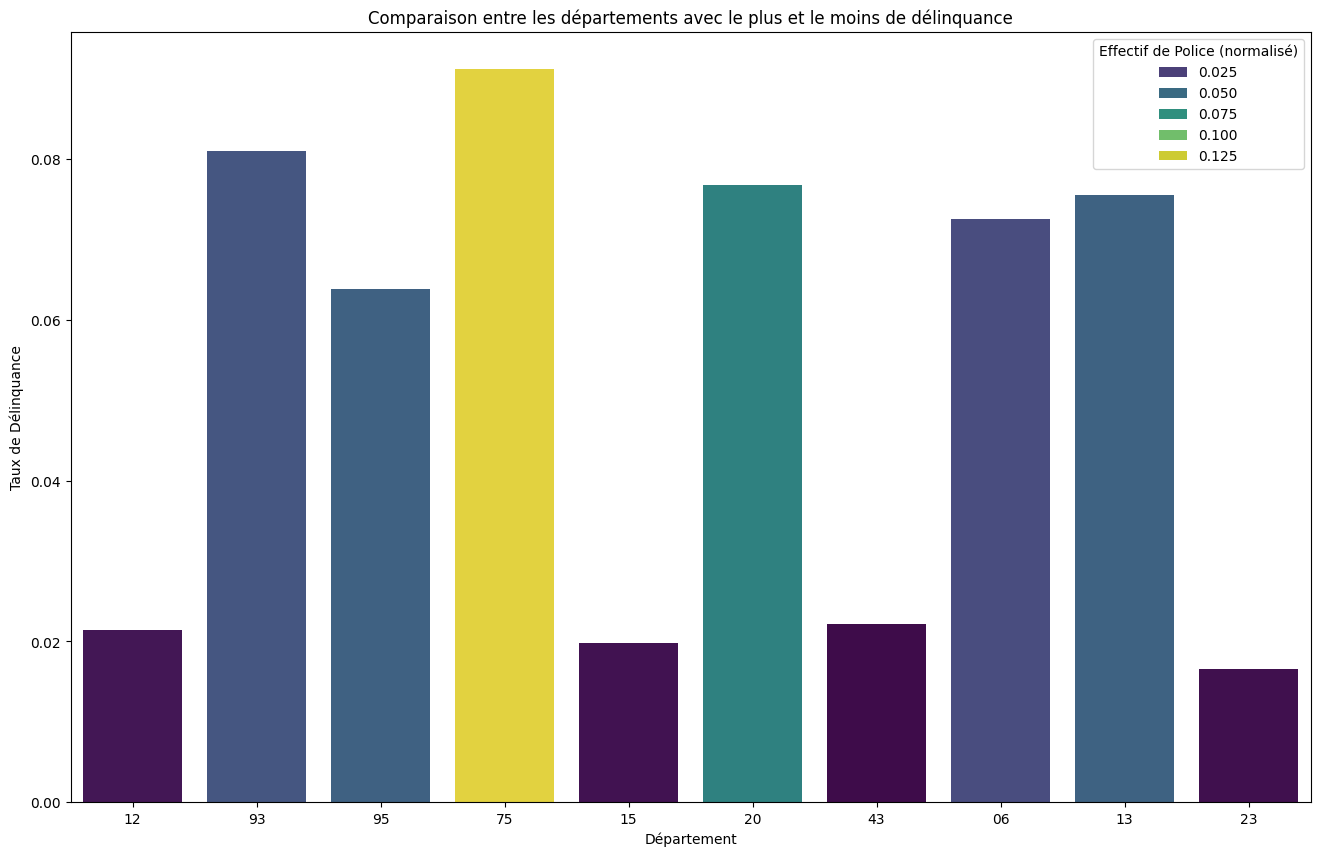

In [106]:
# Calculer le total de délinquance par population pour chaque département
total_delinquencies_per_department = df_police_normalized.groupby('code_dep')['Total_Delinquance_per_population', 'effectif_total_police_national_per_population'].sum().reset_index()

# Sélectionner les 4 départements avec le plus grand nombre de délinquance
top_4_max_delinquencies = total_delinquencies_per_department.nlargest(6, 'Total_Delinquance_per_population')

# Sélectionner les 4 départements avec le moins de délinquance
top_4_min_delinquencies = total_delinquencies_per_department.nsmallest(4, 'Total_Delinquance_per_population')

# Concaténer les deux DataFrames pour avoir un seul DataFrame avec les 8 départements
top_8_delinquencies = pd.concat([top_4_max_delinquencies, top_4_min_delinquencies])

# Mélanger l'ordre des départements
top_8_delinquencies = top_8_delinquencies.sample(frac=1, random_state=42)

# Tracer le graphique à barres
plt.figure(figsize=(16, 10))
sns.barplot(x='code_dep', y='Total_Delinquance_per_population', data=top_8_delinquencies, hue='effectif_total_police_national_per_population', palette='viridis')
plt.xlabel('Département')
plt.ylabel('Taux de Délinquance')
plt.title('Comparaison entre les départements avec le plus et le moins de délinquance')
plt.legend(title='Effectif de Police (normalisé)')

plt.show()



Les départements présentant un niveau plus élevé de délinquance tendent à avoir un nombre plus important de policiers. Donc la simple présence de policiers ne garantit pas automatiquement un niveau accru de sécurité.